# Environment & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [4]:
df_pca = pd.read_csv("../../data/modeling_data/berlin_subdistricts_pca.csv")

ortsteile = df_pca["ortsteil"]
X = df_pca.drop(columns=["ortsteil"])  # features only

In [5]:
print("Shape of input data:", X.shape)
X.head()

Shape of input data: (96, 20)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.370051,1.171972,-0.951214,1.888563,4.988381,-2.493261,-1.521879,-0.578874,0.674047,1.318207,-0.925301,0.594750,-0.582170,0.163724,0.055210,-0.514671,0.088352,-2.097385,-0.474798,1.200024
1,1.227283,-1.022582,-5.832430,1.283584,-5.192638,-3.466457,0.745441,-0.353733,0.727967,-0.594366,0.300367,-0.631841,0.649281,-0.159052,0.512817,0.208069,-0.259544,-0.603684,0.017319,0.914424
2,-4.843446,1.653133,-1.014895,1.547838,4.705816,-2.122332,-1.171324,0.298345,1.759987,0.522939,-0.288821,1.023608,-0.884174,1.913721,1.362407,0.483621,1.896941,0.902472,0.129598,-0.068062
3,-3.952949,0.511743,-0.970709,2.708536,4.381397,-2.251667,-0.923580,-1.239347,-0.277514,1.568697,-1.303066,1.462169,0.071029,1.532003,0.505738,2.389422,-1.183935,-2.280063,-0.983487,0.630651
4,-4.715395,1.259656,-0.830236,1.684494,4.047470,-2.366258,-0.806728,-1.046404,-0.126647,0.847051,-0.942727,0.359585,-0.525800,-0.708029,0.453273,-0.396344,0.336611,-0.153982,-0.076349,0.007442


# Elbow Method

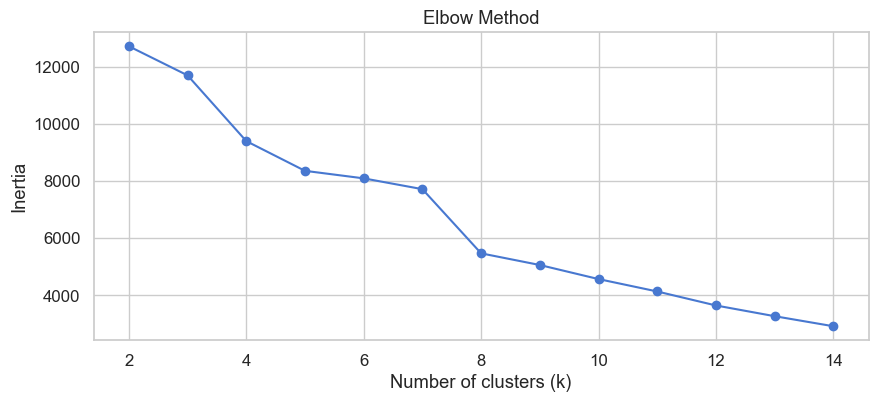

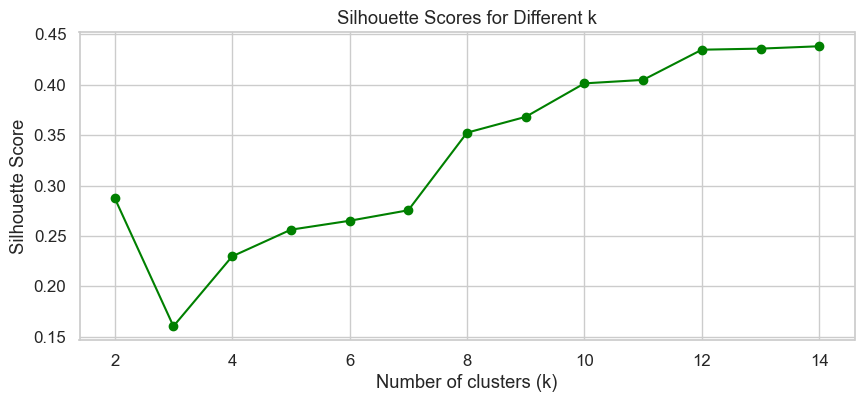

In [6]:
# Run KMeans for a range of cluster numbers
inertia = []
silhouette_scores = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Curve (Inertia)
plt.figure(figsize=(10, 4))
plt.plot(K, inertia, 'o-', label="Inertia")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(K, silhouette_scores, 'o-', color="green", label="Silhouette Score")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.show()

# K-Mean Clustering

In [7]:
# Train KMeans with k=5 and k=8
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_8 = KMeans(n_clusters=8, random_state=42)

labels_5 = kmeans_5.fit_predict(X)
labels_8 = kmeans_8.fit_predict(X)

# Create a copy to compare both clusterings
df_clusters = ortsteile.to_frame()
df_clusters["k5_cluster"] = labels_5
df_clusters["k8_cluster"] = labels_8

# Number of subdistricts per cluster
print(df_clusters["k5_cluster"].value_counts().sort_index())
print(df_clusters["k8_cluster"].value_counts().sort_index())

k5_cluster
0    14
1    41
2    10
3    11
4    20
Name: count, dtype: int64
k8_cluster
0    12
1    26
2     6
3     4
4    10
5    17
6     3
7    18
Name: count, dtype: int64


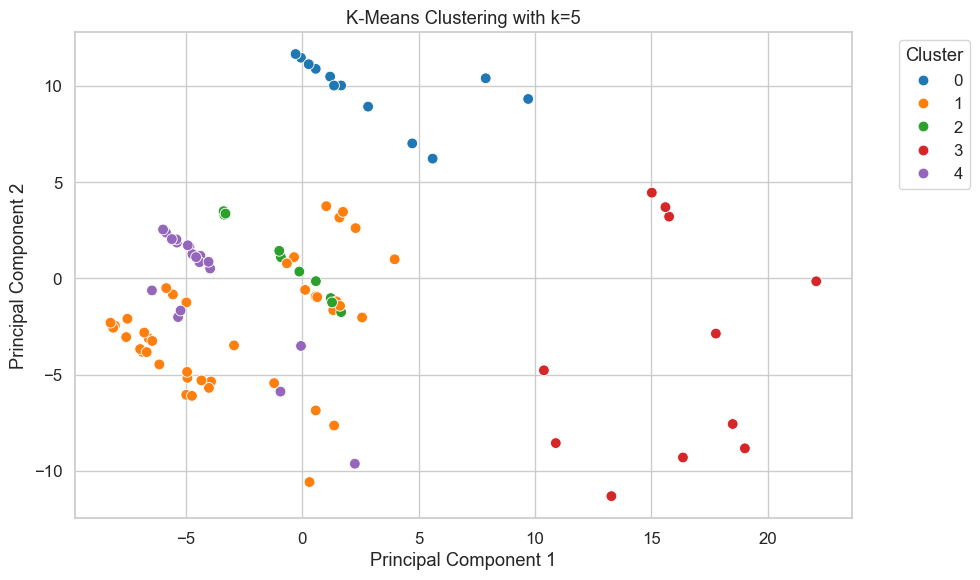

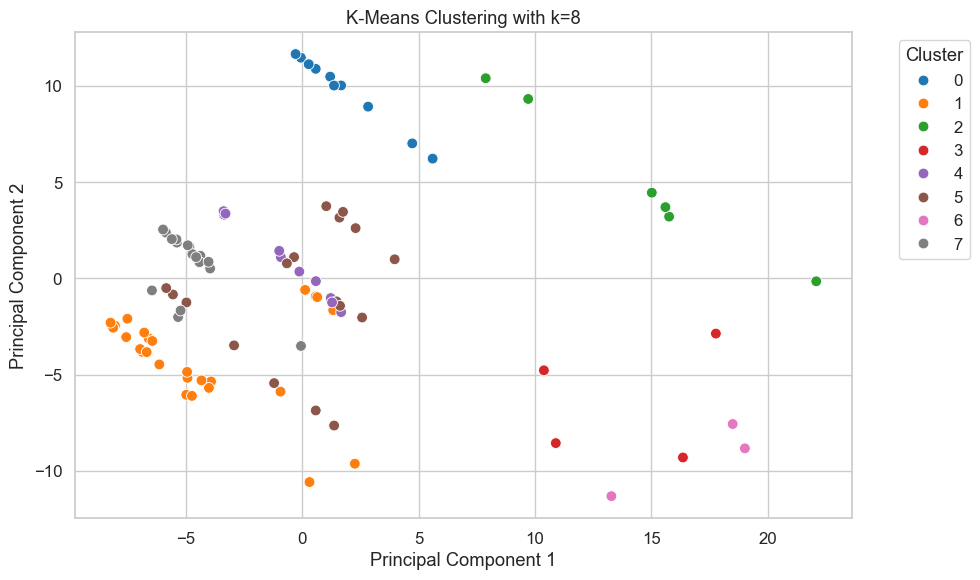

In [8]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X["PC1"], y=X["PC2"], hue=labels, palette="tab10", s=60)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot both
X_plot = X.copy()
X_plot["PC1"] = X.iloc[:, 0]
X_plot["PC2"] = X.iloc[:, 1]

plot_clusters(X_plot, labels_5, "K-Means Clustering with k=5")
plot_clusters(X_plot, labels_8, "K-Means Clustering with k=8")

# Analyse Clusters

In [ ]:
# Add ortsteil back to your PCA dataframe
df_pca = pd.DataFrame(X, columns=[f"PC{i+1}" for i in range(X.shape[1])])
df_pca["ortsteil"] = ortsteile.values

# Add cluster labels
df_pca["k5_cluster"] = kmeans_5.labels_
df_pca["k8_cluster"] = kmeans_8.labels_

# Save enriched dataframe (optional, for future use)
# df_pca.to_csv("../../data/modeling_data/berlin_subdistricts_pca_clusters.csv", index=False)

# Preview
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,ortsteil,k5_cluster,k8_cluster
0,-4.370051,1.171972,-0.951214,1.888563,4.988381,-2.493261,-1.521879,-0.578874,0.674047,1.318207,...,0.163724,0.055210,-0.514671,0.088352,-2.097385,-0.474798,1.200024,adlershof,4,7
1,1.227283,-1.022582,-5.832430,1.283584,-5.192638,-3.466457,0.745441,-0.353733,0.727967,-0.594366,...,-0.159052,0.512817,0.208069,-0.259544,-0.603684,0.017319,0.914424,alt-hohenschoenhausen,2,4
2,-4.843446,1.653133,-1.014895,1.547838,4.705816,-2.122332,-1.171324,0.298345,1.759987,0.522939,...,1.913721,1.362407,0.483621,1.896941,0.902472,0.129598,-0.068062,alt-treptow,4,7
3,-3.952949,0.511743,-0.970709,2.708536,4.381397,-2.251667,-0.923580,-1.239347,-0.277514,1.568697,...,1.532003,0.505738,2.389422,-1.183935,-2.280063,-0.983487,0.630651,altglienicke,4,7
4,-4.715395,1.259656,-0.830236,1.684494,4.047470,-2.366258,-0.806728,-1.046404,-0.126647,0.847051,...,-0.708029,0.453273,-0.396344,0.336611,-0.153982,-0.076349,0.007442,baumschulenweg,4,7


In [ ]:
# Merge with original features
df_master = pd.read_csv("../../data/master_tables/berlin_final_master_table.csv")

# Merge cluster labels into master table
df_clustered = df_master.merge(
    df_pca[["ortsteil", "k5_cluster", "k8_cluster"]],
    on="ortsteil"
)

# Save as CSV
# df_clustered.to_csv("../../data/modeling_data/berlin_master_with_clusters.csv", index=False)

## K-Meas k=5

In [13]:
# Group original data by k=5 clusters
k5_profiles = df_clustered.groupby("k5_cluster").mean(numeric_only=True)

# Group original data by k=8 clusters
k8_profiles = df_clustered.groupby("k8_cluster").mean(numeric_only=True)

# Preview one of them
k5_profiles[[
    "subdistrict_avg_median_income_eur",
    "subdistrict_avg_mietspiegel_classification",
    "total_population",
    "subdistrict_youth_share",
    "subdistrict_senior_share",
    "cafes",
    "bar",
    "supermarket",
    "subdistrict_middle_age_population",
    "green_space"
]].round(1)

,subdistrict_avg_median_income_eur,subdistrict_avg_mietspiegel_classification,total_population,subdistrict_youth_share,subdistrict_senior_share,cafes,bar,supermarket,subdistrict_middle_age_population,green_space
k5_cluster,,,,,,,,,,
0,4143.4,1.9,19037.5,0.2,0.2,0.2,2.6,6.8,0.6,20.1
1,4156.3,1.9,31951.9,0.2,0.3,0.2,2.3,10.8,0.6,30.0
2,3575.7,1.6,29683.7,0.2,0.2,0.2,3.6,9.3,0.6,24.2
3,4207.1,2.0,121442.5,0.2,0.1,3.1,65.6,48.7,0.7,125.1
4,3886.1,1.8,27494.8,0.2,0.2,0.3,2.8,9.5,0.6,23.2


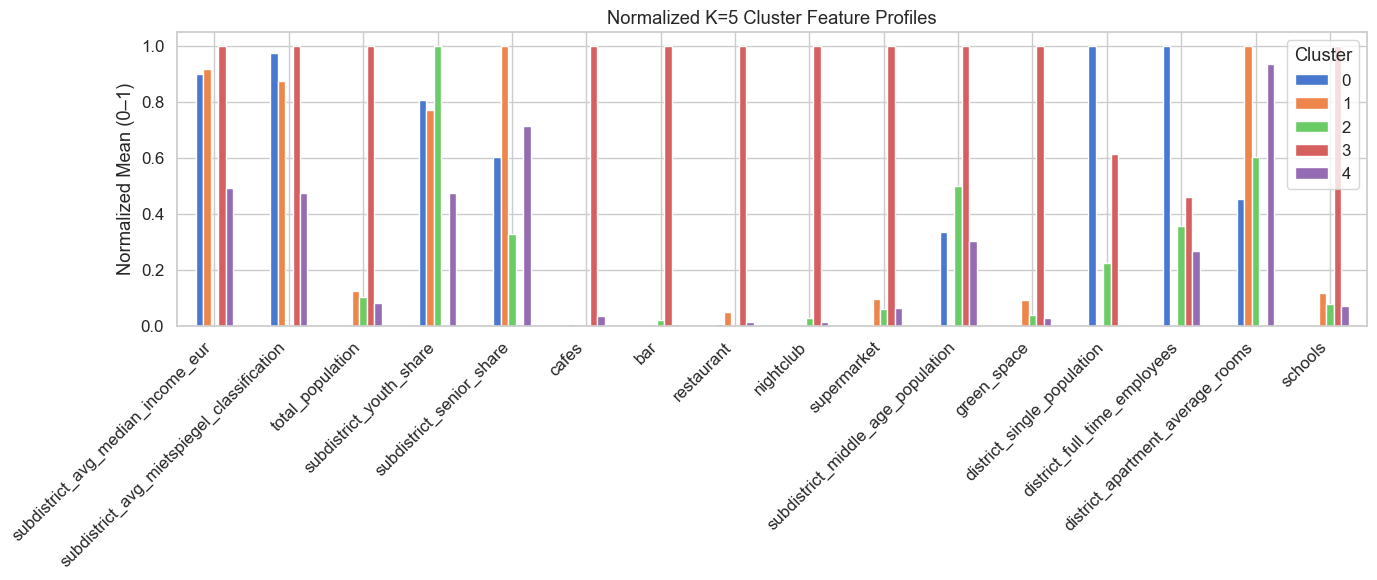

In [20]:
# Choose a few key features
features = [
    "subdistrict_avg_median_income_eur",
    "subdistrict_avg_mietspiegel_classification",
    "total_population",
    "subdistrict_youth_share",
    "subdistrict_senior_share",
    "cafes",
    "bar",
    "restaurant",
    "nightclub",
    "supermarket",
    "subdistrict_middle_age_population",
    "green_space",
    "district_single_population",
    "district_full_time_employees",
    "district_apartment_average_rooms",
    "schools",

]

from sklearn.preprocessing import MinMaxScaler

# Scale only the numeric cluster means
scaler = MinMaxScaler()
k5_scaled = pd.DataFrame(
    scaler.fit_transform(k5_profiles[features]),
    columns=features,
    index=k5_profiles.index
)

# Plot
k5_scaled.T.plot(kind="bar", figsize=(14, 6))
plt.title("Normalized K=5 Cluster Feature Profiles")
plt.ylabel("Normalized Mean (0–1)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()

## K-Means k=8

In [21]:
# Group original data by k=8 clusters
k8_profiles = df_clustered.groupby("k8_cluster").mean(numeric_only=True)

# Preview one of them
k8_profiles[[
    "subdistrict_avg_median_income_eur",
    "subdistrict_avg_mietspiegel_classification",
    "total_population",
    "subdistrict_youth_share",
    "subdistrict_senior_share",
    "cafes",
    "bar",
    "supermarket",
    "subdistrict_middle_age_population",
    "green_space"
]].round(1)

,subdistrict_avg_median_income_eur,subdistrict_avg_mietspiegel_classification,total_population,subdistrict_youth_share,subdistrict_senior_share,cafes,bar,supermarket,subdistrict_middle_age_population,green_space
k8_cluster,,,,,,,,,,
0,4037.6,1.9,20471.8,0.2,0.2,0.1,1.8,7.5,0.6,21.5
1,3952.2,1.6,33483.5,0.2,0.2,0.2,2.8,11.0,0.6,26.6
2,4317.6,2.0,63893.3,0.2,0.1,1.3,40.0,24.3,0.7,65.0
3,4483.0,2.3,129737.2,0.2,0.2,5.0,53.0,55.2,0.7,140.5
4,3575.7,1.6,29683.7,0.2,0.2,0.2,3.6,9.3,0.6,24.2
5,4356.9,2.3,37357.1,0.2,0.3,0.2,2.5,12.9,0.6,39.7
6,3999.2,1.7,151474.3,0.2,0.1,2.7,95.0,58.0,0.7,149.3
7,3961.4,1.8,19682.5,0.2,0.2,0.3,1.9,7.1,0.6,18.3


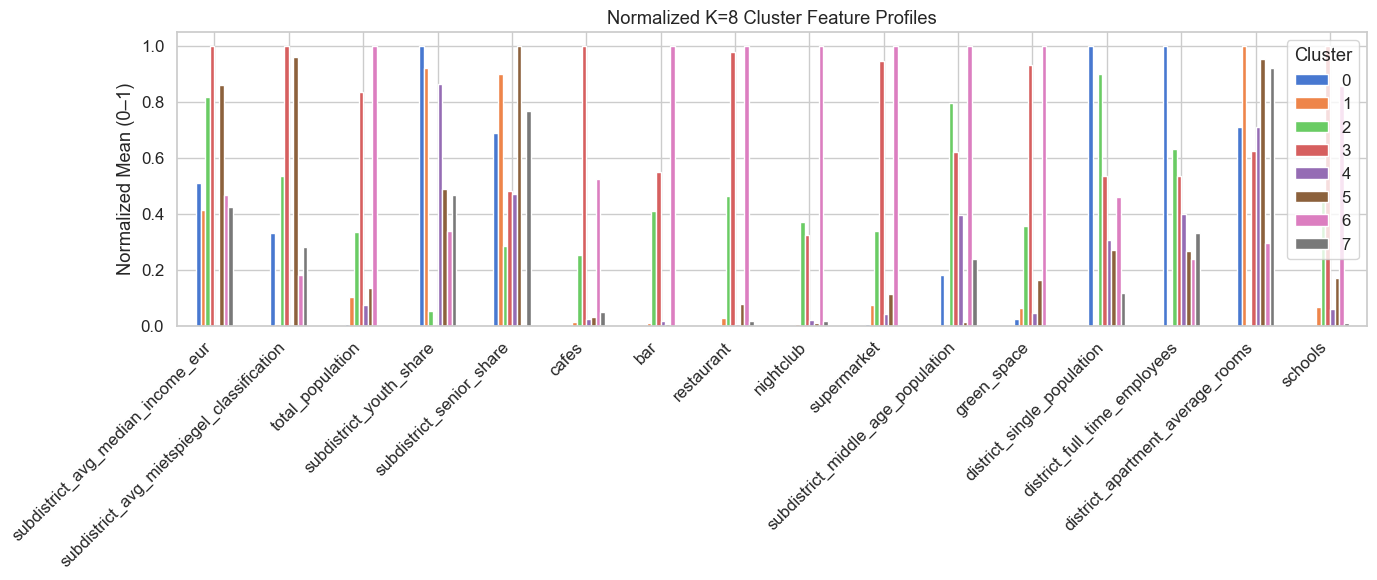

In [25]:
# Choose a few key features
features = [
    "subdistrict_avg_median_income_eur",
    "subdistrict_avg_mietspiegel_classification",
    "total_population",
    "subdistrict_youth_share",
    "subdistrict_senior_share",
    "cafes",
    "bar",
    "restaurant",
    "nightclub",
    "supermarket",
    "subdistrict_middle_age_population",
    "green_space",
    "district_single_population",
    "district_full_time_employees",
    "district_apartment_average_rooms",
    "schools",

]

# Scale only the numeric cluster means
scaler = MinMaxScaler()
k8_scaled = pd.DataFrame(
    scaler.fit_transform(k8_profiles[features]),
    columns=features,
    index=k8_profiles.index
)

# Plot
k8_scaled.T.plot(kind="bar", figsize=(14, 6))
plt.title("Normalized K=8 Cluster Feature Profiles")
plt.ylabel("Normalized Mean (0–1)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()